In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime as dt
import pandas as pd
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 
mpl.rc('legend', numpoints= 1)
mpl.rc('lines', markersize= 8)
%matplotlib inline

/home/eolson/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/eolson/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Mesozooplankton
      REAL(wp), dimension (1:3) :: zz_rate_mesozoo_sumpeakval !uM N magnitude of mesozooplankton summer concentration peaks
      REAL(wp), dimension (1:3) :: zz_rate_mesozoo_sumpeakpos ! year-day times of mesozooplankton summer concentration peaks
      REAL(wp), dimension (1:3) :: zz_rate_mesozoo_sumpeakwid ! year-days widths of mesozooplankton summer concentration peaks

In [87]:
#&nampismezo     !   parameters for microzooplankton
zz_rate_mesozoo_winterconc       = 0.369       #uM N mesozooplankton background concentration
zz_rate_mesozoo_summerconc       = 1.0         # uM N mesozooplankton relative summer concentration
zz_rate_mesozoo_sumpeakval = np.expand_dims(np.array((0.339,   0.0,     0.0)) ,0)     #uM N magnitude of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakpos = np.expand_dims(np.array((217.000, 120.000, 300.000)),0)  # year-day times of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakwid = np.expand_dims(np.array((114.0,   51.600,  40.000)),0)   # year-days widths of mesozooplankton summer concentration peaks,0)

zz_rate_mesozoo_summerconc2       = 1.0         # uM N mesozooplankton relative summer concentration
zz_rate_mesozoo_winterconc2       = 0.38       #uM N mesozooplankton background concentration
zz_rate_mesozoo_sumpeakval2 = np.expand_dims(np.array((0.55,   .56,     0.36)) ,0)     #uM N magnitude of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakwid2 = np.expand_dims(np.array((40.00,  67.00, 43.0)),0)   # year-days widths of mesozooplankton summer concentration peaks,0)
zz_rate_mesozoo_sumpeakpos2 = np.expand_dims(np.array((130.000, 206.00, 290.000)),0)  # year-day times of mesozooplankton summer concentration peaks

zz_rate_mesozoo_summerconc8       = 1.0         # uM N mesozooplankton relative summer concentration
zz_rate_mesozoo_winterconc8       = 0.41       #uM N mesozooplankton background concentration
zz_rate_mesozoo_sumpeakval8 = np.expand_dims(np.array((0.53,   .57,     0.35)) ,0)     #uM N magnitude of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakwid8 = np.expand_dims(np.array((40.00,  65.00, 44.0)),0)   # year-days widths of mesozooplankton summer concentration peaks,0)
zz_rate_mesozoo_sumpeakpos8 = np.expand_dims(np.array((135.000, 208.00, 296.000)),0)  # year-day times of mesozooplankton summer concentration peaks

zz_rate_mesozoo_summerconc3       = 1.0         # uM N mesozooplankton relative summer concentration
zz_rate_mesozoo_winterconc3       = 0.38       #uM N mesozooplankton background concentration
zz_rate_mesozoo_sumpeakval3 = np.expand_dims(np.array((0.33,   .62,     0.55)) ,0)     #uM N magnitude of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakwid3 = np.expand_dims(np.array((19.00,  53.00, 80.0)),0)   # year-days widths of mesozooplankton summer concentration peaks,0)
zz_rate_mesozoo_sumpeakpos3 = np.expand_dims(np.array((95.000, 144.00, 250.000)),0)  # year-day times of mesozooplankton summer concentration peaks


In [88]:
zz_day=np.arange(1,367) # in model, nday_year starts at 1 on jan 1
dts=[dt.datetime(2014,12,31)+dt.timedelta(days=float(ii)) for ii in zz_day]
zz_day=np.expand_dims(zz_day,1)
zz_MesZoBar = zz_rate_mesozoo_winterconc + \
        zz_rate_mesozoo_summerconc*(np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos-365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos+365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) )
zz_MesZoBar2 = zz_rate_mesozoo_winterconc2 + \
        zz_rate_mesozoo_summerconc2*(np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos2)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( 2*zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos2-365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( 2*zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos2+365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) )
zz_MesZoBar3 = zz_rate_mesozoo_winterconc3 + \
        zz_rate_mesozoo_summerconc3*(np.sum ( zz_rate_mesozoo_sumpeakval3 * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos3)**2/zz_rate_mesozoo_sumpeakwid3**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3-365.25)**2/zz_rate_mesozoo_sumpeakwid3**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3+365.25)**2/zz_rate_mesozoo_sumpeakwid3**2),1) )
zz_MesZoBar8 = zz_rate_mesozoo_winterconc8 + \
        zz_rate_mesozoo_summerconc8*(np.sum ( zz_rate_mesozoo_sumpeakval8 * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos8)**2/zz_rate_mesozoo_sumpeakwid8**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval8 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos8-365.25)**2/zz_rate_mesozoo_sumpeakwid8**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval8 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos8+365.25)**2/zz_rate_mesozoo_sumpeakwid8**2),1) )

    
comp1= zz_rate_mesozoo_summerconc3*(np.sum ( zz_rate_mesozoo_sumpeakval3[0,0] * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos3[0,0])**2/zz_rate_mesozoo_sumpeakwid3[0,0]**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3[0,0] * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3[0,0]-365.25)**2/zz_rate_mesozoo_sumpeakwid3[0,0]**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3[0,0] * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3[0,0]+365.25)**2/zz_rate_mesozoo_sumpeakwid3[0,0]**2),1) )

comp2= zz_rate_mesozoo_summerconc3*(np.sum ( zz_rate_mesozoo_sumpeakval3[0,1] * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos3[0,1])**2/zz_rate_mesozoo_sumpeakwid3[0,1]**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3[0,1] * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3[0,1]-365.25)**2/zz_rate_mesozoo_sumpeakwid3[0,1]**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3[0,1] * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3[0,1]+365.25)**2/zz_rate_mesozoo_sumpeakwid3[0,1]**2),1) )

comp3= zz_rate_mesozoo_summerconc3*(np.sum ( zz_rate_mesozoo_sumpeakval3[0,2] * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos3[0,2])**2/zz_rate_mesozoo_sumpeakwid3[0,2]**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3[0,2] * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3[0,2]-365.25)**2/zz_rate_mesozoo_sumpeakwid3[0,2]**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval3[0,2] * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos3[0,2]+365.25)**2/zz_rate_mesozoo_sumpeakwid3[0,2]**2),1) )

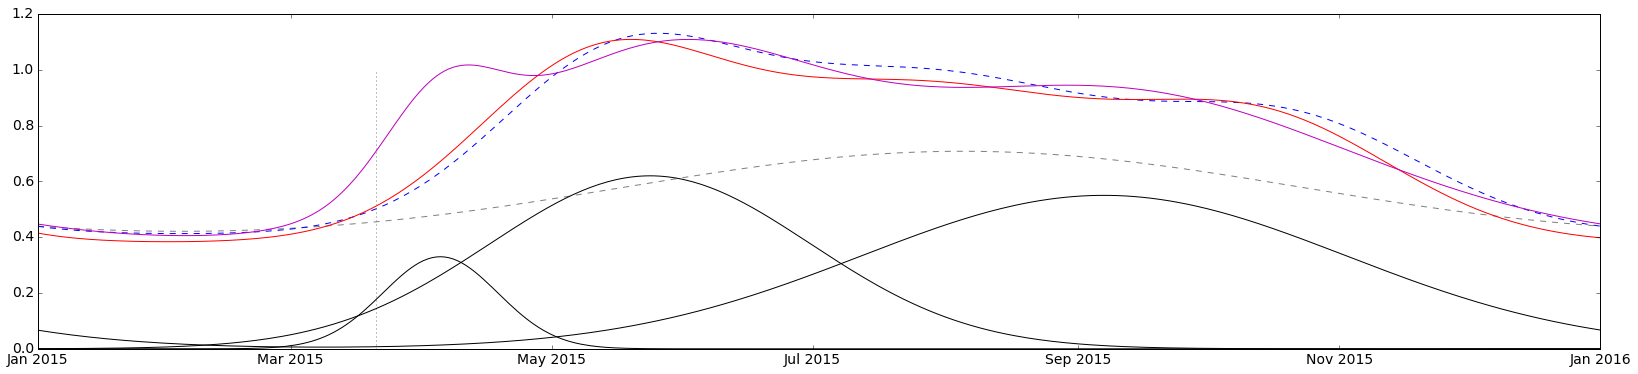

In [89]:
fig,ax=plt.subplots(1,1,figsize=(28,6))
ax.plot(dts,zz_MesZoBar,'--',color='grey')
ax.plot(dts,zz_MesZoBar8,'b--')
ax.plot(dts,zz_MesZoBar2,'r-')
#ax.plot(dts,zz_MesZoBar2,'r-')
ax.plot(dts,zz_MesZoBar3,'m-')
ax.plot((dt.datetime(2015,3,21),dt.datetime(2015,3,21)),(0,1),':',color='grey')

ax.plot(dts,comp1,'-',color='k')
ax.plot(dts,comp2,'-',color='k')
ax.plot(dts,comp3,'-',color='k')

In [90]:
df=pd.read_excel('/ocean/eolson/MEOPAR/obs/MackasZoop/1-s2.0-S007966111300061X-mmc2.xls',skiprows=1)
df=df.dropna(0,how='any', subset=['Year','Month','Day']).dropna(1,how='any',thresh=200)

In [91]:
df.keys()


Index(['Sample ID', 'Station name', 'Longitude (deg W)', 'Latitude (deg N)',
       'Day', 'Month', 'Year', 'Decimal year', 'Local Time (hr)',
       'Day or Night', 'Net + Tow Type', 'Tow Depth Range (m)',
       'Bottom Depth (m)', 'Volume Filtered (m3)', 'Total Biomass',
       'Total Copepods', 'Calanoids<1mm', 'Calanoids 1-3mm', 'Calanoids 3-5mm',
       'Calanoids >5mm', 'Total Euphausiids >1 cm', 'E. pacifica > 1cm',
       'Thysanoessa >1cm', 'Gammarids', 'Hyperiids', 'Ostracods', 'Shrimps',
       'Crab larvae', 'Cladocerans', 'Chaetognaths', 'Pteropods', 'Larvaceans',
       'Polychaetes', 'Siphonophores', 'Medusae', 'Ctenophores'],
      dtype='object')

In [92]:
yd=[(dt.datetime(int(r.Year),int(r.Month),int(r.Day))-dt.datetime(int(r.Year)-1,12,31)).days for i,r in df.iterrows()]

In [93]:
df=df.assign(yd=yd).sort_values(by='yd')

In [85]:
dtsdf=[dt.datetime(2014,12,31)+dt.timedelta(days=int(ii)) for ii in df['yd'].values]

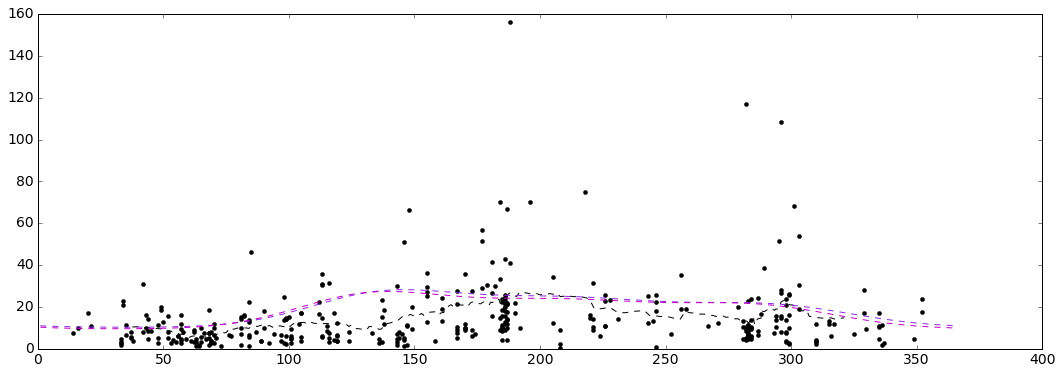

In [86]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
ax.plot(df['yd'],df['Total Biomass'],'k.')
ax.plot(np.convolve(df['yd'], np.ones((30,))/30, mode='valid'),np.convolve(df['Total Biomass'].values, np.ones((30,))/30, mode='valid'),'k--')

ax.plot(zz_day,zz_MesZoBar8*25,'--',color='blueviolet')
ax.plot(zz_day,zz_MesZoBar2*25,'--',color='m')

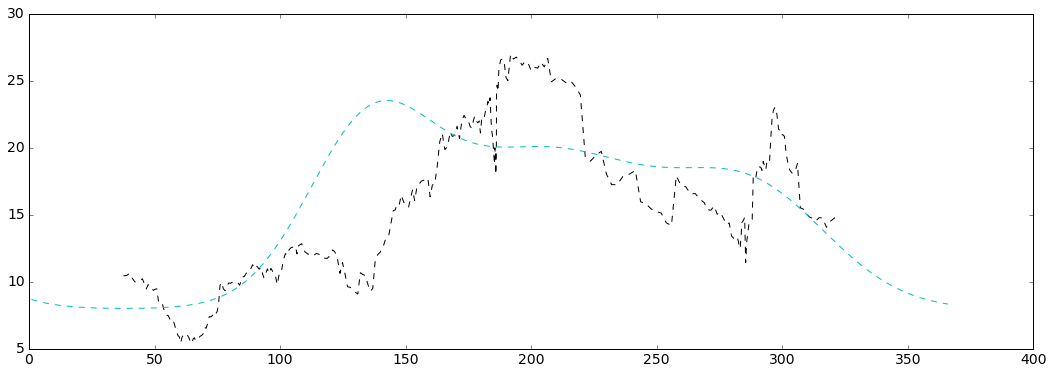

In [75]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
#ax.plot(df['yd'],df['Total Biomass'],'k-')
ii=30
ax.plot(np.convolve(df['yd'], np.ones((ii,))/ii, mode='valid'),np.convolve(df['Total Biomass'].values, np.ones((ii,))/ii, mode='valid'),'k--')

ax.plot(zz_day,zz_MesZoBar2*21,'c--')

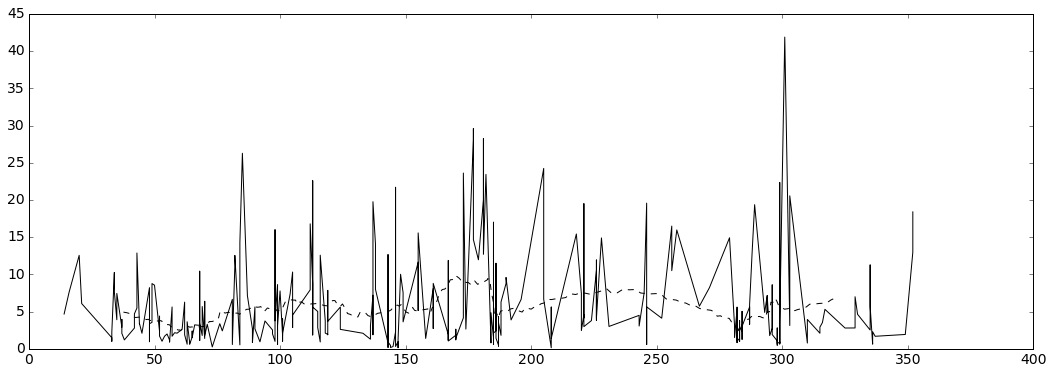

In [76]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
ax.plot(df['yd'],df['Total Copepods'],'k-')
ii=30
ax.plot(np.convolve(df['yd'], np.ones((ii,))/ii, mode='valid'),np.convolve(df['Total Copepods'].values, np.ones((ii,))/ii, mode='valid'),'k--')

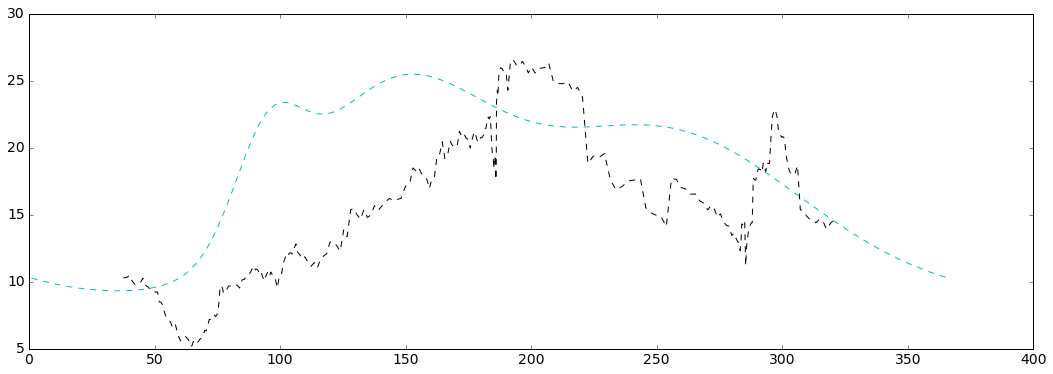

In [77]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
#ax.plot(df['yd'],df['Total Copepods'],'k-')
ii=30
tdf=df.dropna(axis=0,subset=['Calanoids<1mm'])
ax.plot(np.convolve(tdf['yd'], np.ones((ii,))/ii, mode='valid'),np.convolve(tdf['Total Biomass'].values-tdf['Calanoids<1mm'].values, np.ones((ii,))/ii, mode='valid'),'k--')
ax.plot(zz_day,zz_MesZoBar3*23,'c--')